# FORMAL TEST OF DATA LOADER

### Example fly 1 (closed loop)

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from data_handling import DataLoaderClosedLoop
from db import connect_and_make_session
from db import _models
from plot import set_fontsize

RECORDING_SESSION = '20160904.Fly5.3.10Hz Closed Loop'
DATA_ROOT_DIR = '/Users/rkp/Dropbox/mushroom_data/large_data_set'

DATA_DIR = '/Users/rkp/Dropbox/mushroom_data/large_data_set/10Hz Closed Loop/20160904.Fly5/20160904.Fly5.3'
GCAMP_FILE = 'ROI-profiles.txt'
BEHAV_FILE = '20160904_Fly5_THDDC-GCaMP_CL3_ACV.dat'
LIGHT_TIMES_FILE = 'Light_Times.xlsx'

# load data using data loader

session = connect_and_make_session('mushroom_mushroom')
rs = session.query(_models.RecordingSession).get(RECORDING_SESSION)
dl = DataLoaderClosedLoop(DATA_ROOT_DIR, rs)

dl.filter_velocities_exp(None)
dl.resample_behavioral_data_gcamp_matched()

# load GCAMP data using pandas

df_gcamp = pd.read_csv(os.path.join(DATA_DIR, GCAMP_FILE), header=None)

# load behavior using pandas

df_behav = pd.read_csv(os.path.join(DATA_DIR, BEHAV_FILE), header=None)

# load light times

df_light_times = pd.read_excel(os.path.join(DATA_DIR, LIGHT_TIMES_FILE), header=None)

In [2]:
# make sure extracted arrays for example red and green signals line up with signals in data frame
# note that the last time point in the dl signal is about 10 time points before the last one
# in the data frame

print(dl.red[:, 5])
print(dl.green[:, 5])
print(df_gcamp.iloc[5, :5])
print(df_gcamp.iloc[5, -15:])
print(df_gcamp.iloc[13, :5])
print(df_gcamp.iloc[13, -15:])

[ 1714.7283  1690.6584  1604.8325 ...,  1153.7145  1123.1807  1189.4166]
[ 2157.7932  2235.1479  2194.8069 ...,  1818.3336  1793.8223  2088.1458]
0    C1-20160904_Fly5_THDDC-GCaMP6s_CL3_ACV-069
1                                           G3L
2                                       1714.73
3                                       1690.66
4                                       1604.83
Name: 5, dtype: object
3017    1216.92
3018    1190.55
3019    1172.67
3020    1153.71
3021    1123.18
3022    1189.42
3023    1206.02
3024    1175.84
3025    1193.77
3026    1101.06
3027    1103.35
3028    1190.86
3029    1143.35
3030    1160.89
3031    1127.03
Name: 5, dtype: object
0    C2-20160904_Fly5_THDDC-GCaMP6s_CL3_ACV-069
1                                           G3L
2                                       2157.79
3                                       2235.15
4                                       2194.81
Name: 13, dtype: object
3017    1903.53
3018    1821.26
3019    1826.39
3020    1818.33


/Users/rkp/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


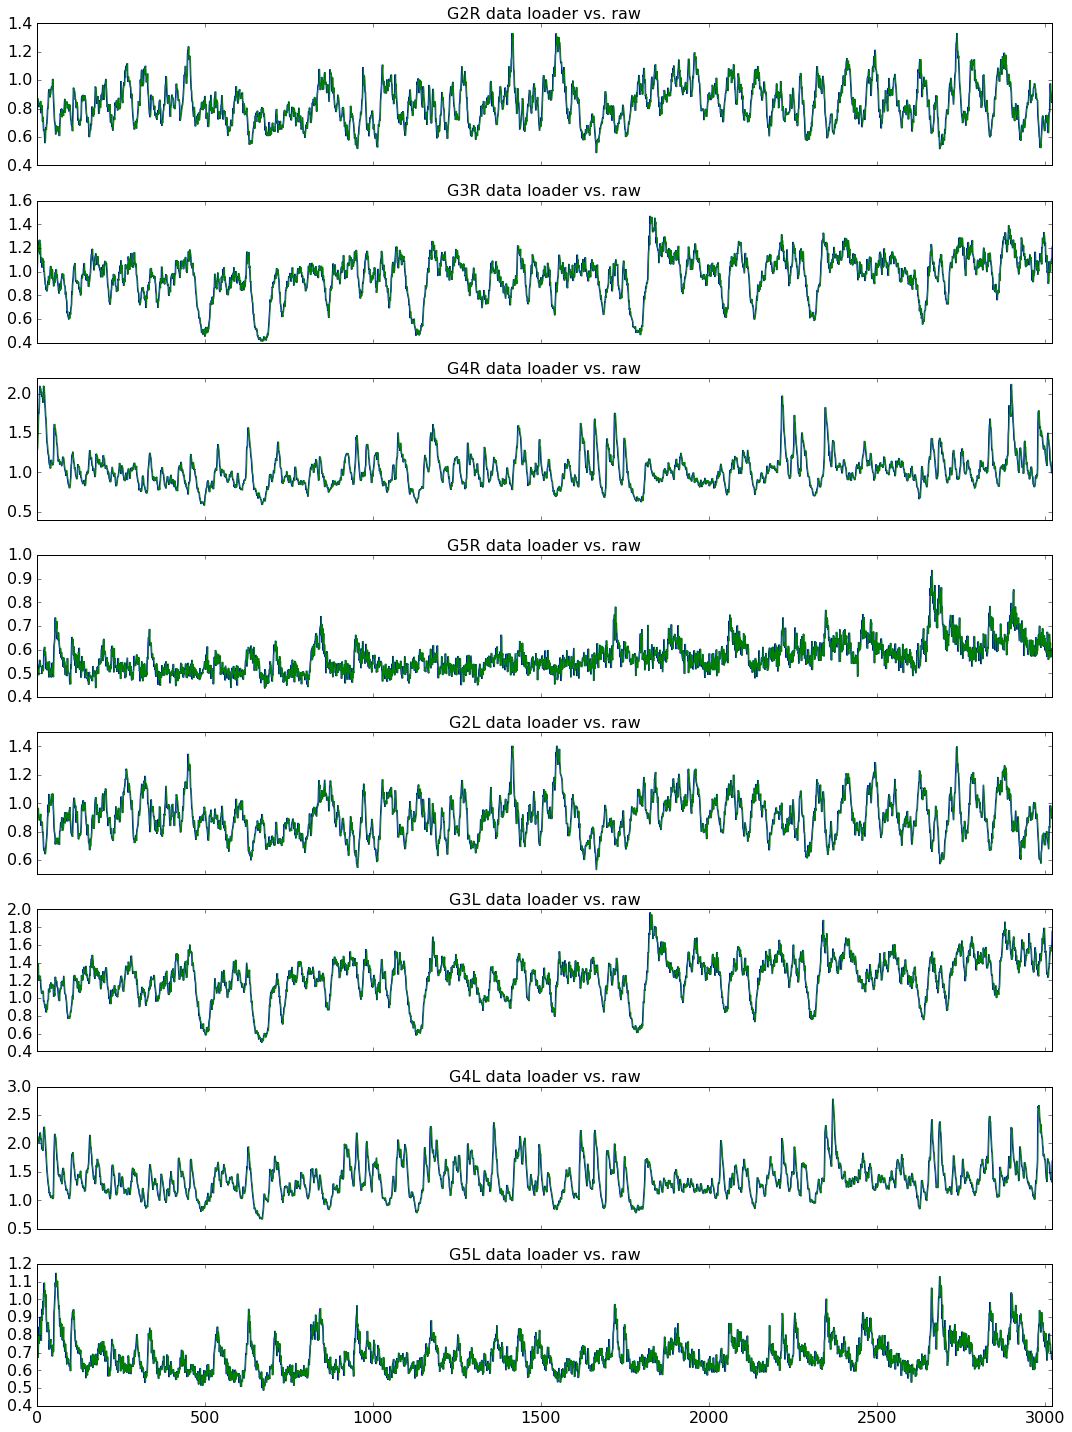

In [3]:
%matplotlib inline
fig, axs = plt.subplots(8, 1, figsize=(15, 20), sharex=True, tight_layout=True)

for ctr, label in enumerate(dl.gcamp_labels):
    
    axs[ctr].plot(getattr(dl, label))
    axs[ctr].plot(df_gcamp.iloc[ctr + 8, 2:] / df_gcamp.iloc[ctr, 2:])
    
    axs[ctr].set_xlim(0, len(getattr(dl, label)))
    
    axs[ctr].set_title('{} data loader vs. raw'.format(label))
    
for ax in axs:
    
    set_fontsize(ax, 16)

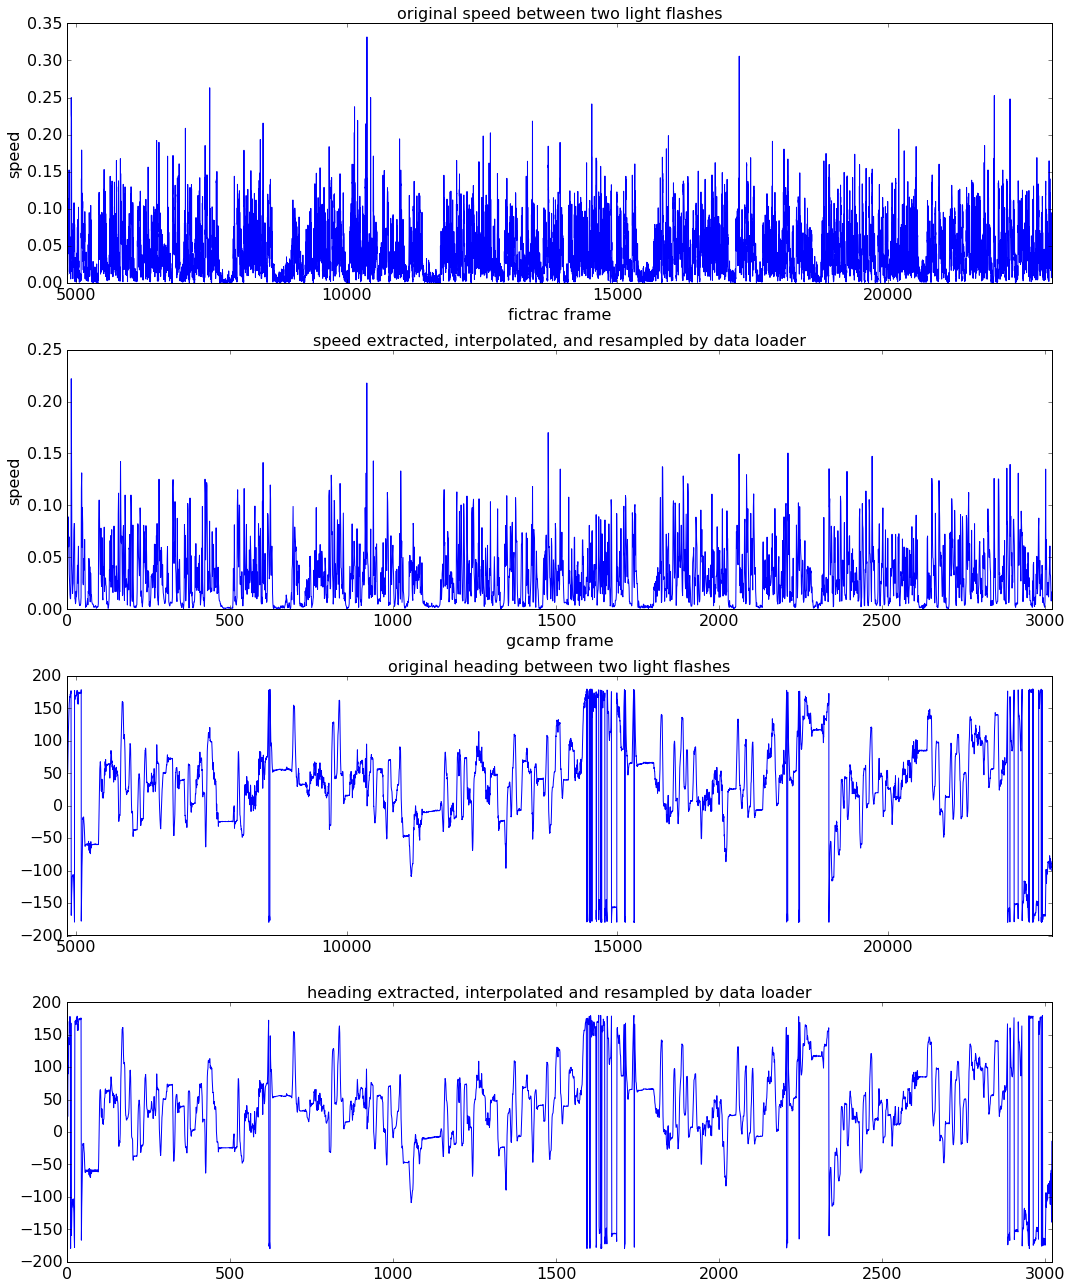

In [4]:
# plot behavioral data extracted directly from file vs processed through data loader

fig, axs = plt.subplots(4, 1, figsize=(15, 18), tight_layout=True)

br_speed_df = np.sqrt((df_behav.iloc[:, 5]**2 + df_behav.iloc[:, 6]**2 + df_behav.iloc[:, 7]**2))

axs[0].plot(df_behav.iloc[:, 0], br_speed_df)
axs[0].set_xlim(df_light_times.iloc[0, 0], df_light_times.iloc[1, 0])

axs[0].set_xlabel('fictrac frame')
axs[0].set_ylabel('speed')
axs[0].set_title('original speed between two light flashes')

axs[1].plot(dl.ball_rotation_speed)
axs[1].set_xlim(0, len(dl.ball_rotation_speed))

axs[1].set_xlabel('gcamp frame')
axs[1].set_ylabel('speed')
axs[1].set_title('speed extracted, interpolated, and resampled by data loader')

heading_df = (df_behav.iloc[:, 16] - np.pi) * 180 / np.pi

axs[2].plot(df_behav.iloc[:, 0], heading_df)
axs[2].set_xlim(df_light_times.iloc[0, 0], df_light_times.iloc[1, 0])
axs[2].set_title('original heading between two light flashes')

axs[3].plot(dl.heading)
axs[3].set_xlim(0, len(dl.heading))
axs[3].set_title('heading extracted, interpolated and resampled by data loader')

for ax in axs:
    
    set_fontsize(ax, 16)

### Example fly 2 (closed loop)

In [5]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from data_handling import DataLoaderClosedLoop
from db import connect_and_make_session
from db import _models
from plot import set_fontsize

RECORDING_SESSION = '20160906.Fly6.1.10Hz Closed Loop'
DATA_ROOT_DIR = '/Users/rkp/Dropbox/mushroom_data/large_data_set'

DATA_DIR = '/Users/rkp/Dropbox/mushroom_data/large_data_set/10Hz Closed Loop/20160906.Fly6/20160906.Fly6.1'
GCAMP_FILE = 'ROI-profiles.txt'
BEHAV_FILE = '20160906_Fly6_THDDC-GCaMP_CL1_EA.dat'
LIGHT_TIMES_FILE = 'Light_Times.xlsx'

# load data using data loader

session = connect_and_make_session('mushroom_mushroom')
rs = session.query(_models.RecordingSession).get(RECORDING_SESSION)
dl = DataLoaderClosedLoop(DATA_ROOT_DIR, rs)

dl.filter_velocities_exp(None)
dl.resample_behavioral_data_gcamp_matched()

# load GCAMP data using pandas

df_gcamp = pd.read_csv(os.path.join(DATA_DIR, GCAMP_FILE), header=None)

# load behavior using pandas

df_behav = pd.read_csv(os.path.join(DATA_DIR, BEHAV_FILE), header=None)

# load light times

df_light_times = pd.read_excel(os.path.join(DATA_DIR, LIGHT_TIMES_FILE), header=None)

In [6]:
# make sure extracted arrays for example red and green signals line up with signals in data frame
# note that the last time point in the dl signal is about 10 time points before the last one
# in the data frame

print(dl.red[:, 5])
print(dl.green[:, 5])
print(df_gcamp.iloc[5, :5])
print(df_gcamp.iloc[5, -15:])
print(df_gcamp.iloc[13, :5])
print(df_gcamp.iloc[13, -15:])

[ 1978.1895  1965.4036  1967.7866 ...,  1217.8883  1242.1986  1235.3562]
[ 2625.5859  2830.219   2918.6445 ...,  1538.4877  1489.6106  1448.6686]
0    C1-20160906_Fly6_THDDC-GCaMP6s_CL1_ACV-158
1                                           G3L
2                                       1978.19
3                                        1965.4
4                                       1967.79
Name: 5, dtype: object
3017    1291.28
3018    1256.18
3019    1217.89
3020     1242.2
3021    1235.36
3022    1322.59
3023    1294.92
3024    1246.83
3025    1290.48
3026    1221.08
3027    1257.97
3028    1229.67
3029    1245.73
3030    1236.05
3031    1266.15
Name: 5, dtype: object
0    C2-20160906_Fly6_THDDC-GCaMP6s_CL1_ACV-158
1                                           G3L
2                                       2625.59
3                                       2830.22
4                                       2918.64
Name: 13, dtype: object
3017     1511.2
3018    1501.28
3019    1538.49
3020    1489.61


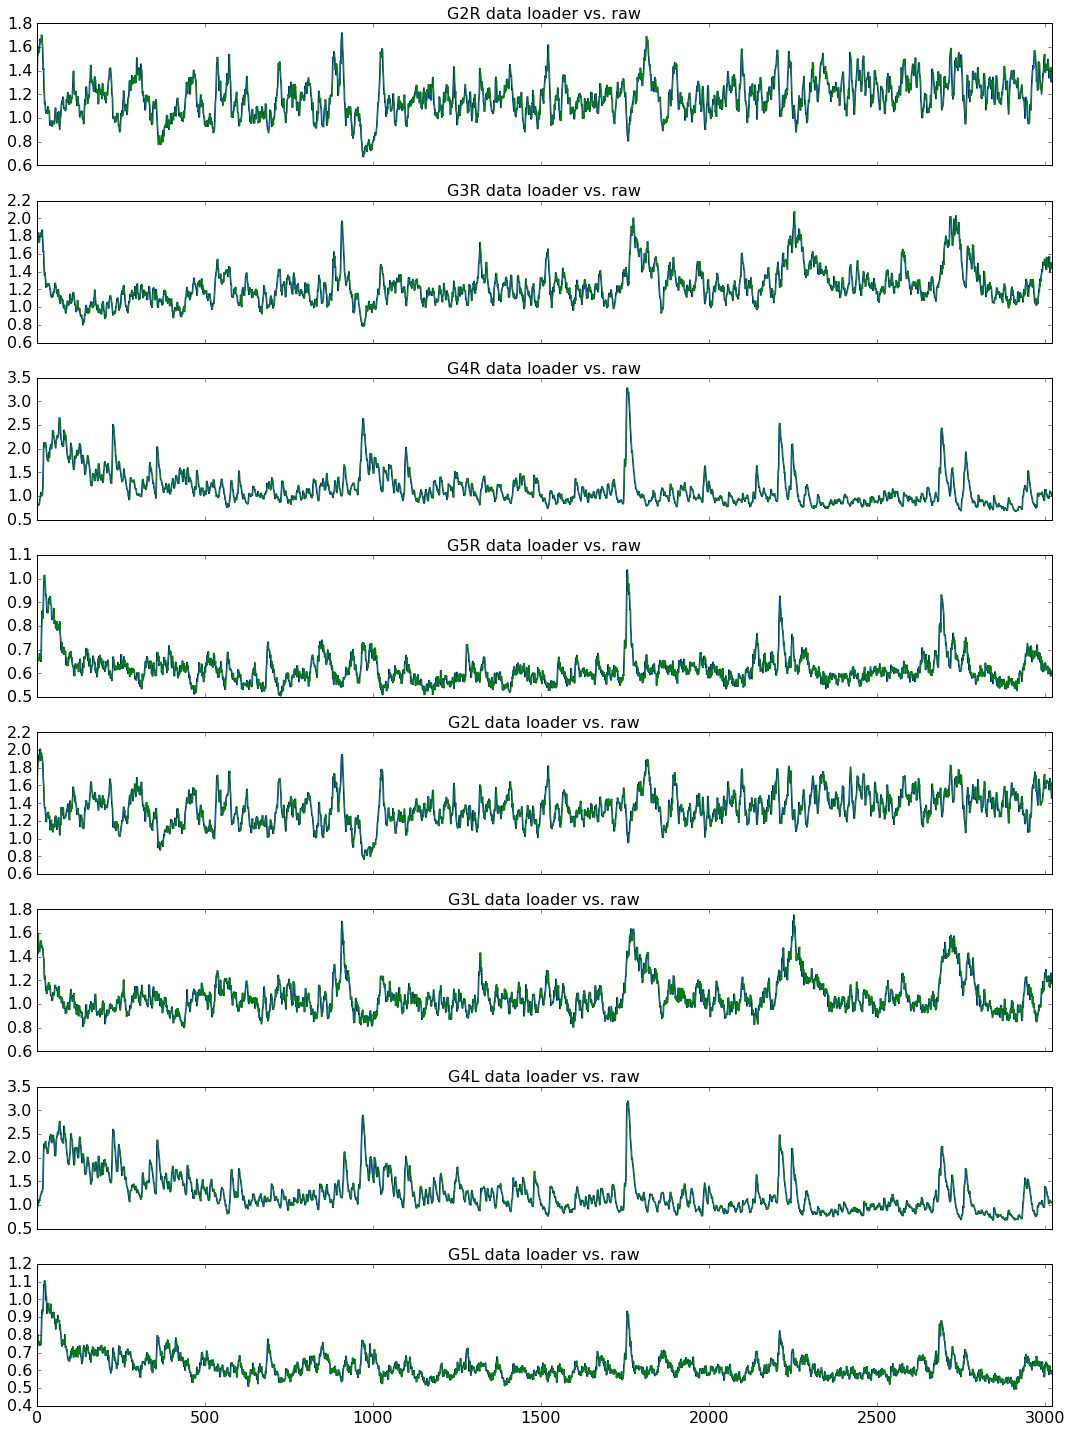

In [7]:
%matplotlib inline
fig, axs = plt.subplots(8, 1, figsize=(15, 20), sharex=True, tight_layout=True)

for ctr, label in enumerate(dl.gcamp_labels):
    
    axs[ctr].plot(getattr(dl, label))
    axs[ctr].plot(df_gcamp.iloc[ctr + 8, 2:] / df_gcamp.iloc[ctr, 2:])
    
    axs[ctr].set_xlim(0, len(getattr(dl, label)))
    
    axs[ctr].set_title('{} data loader vs. raw'.format(label))
    
for ax in axs:
    
    set_fontsize(ax, 16)

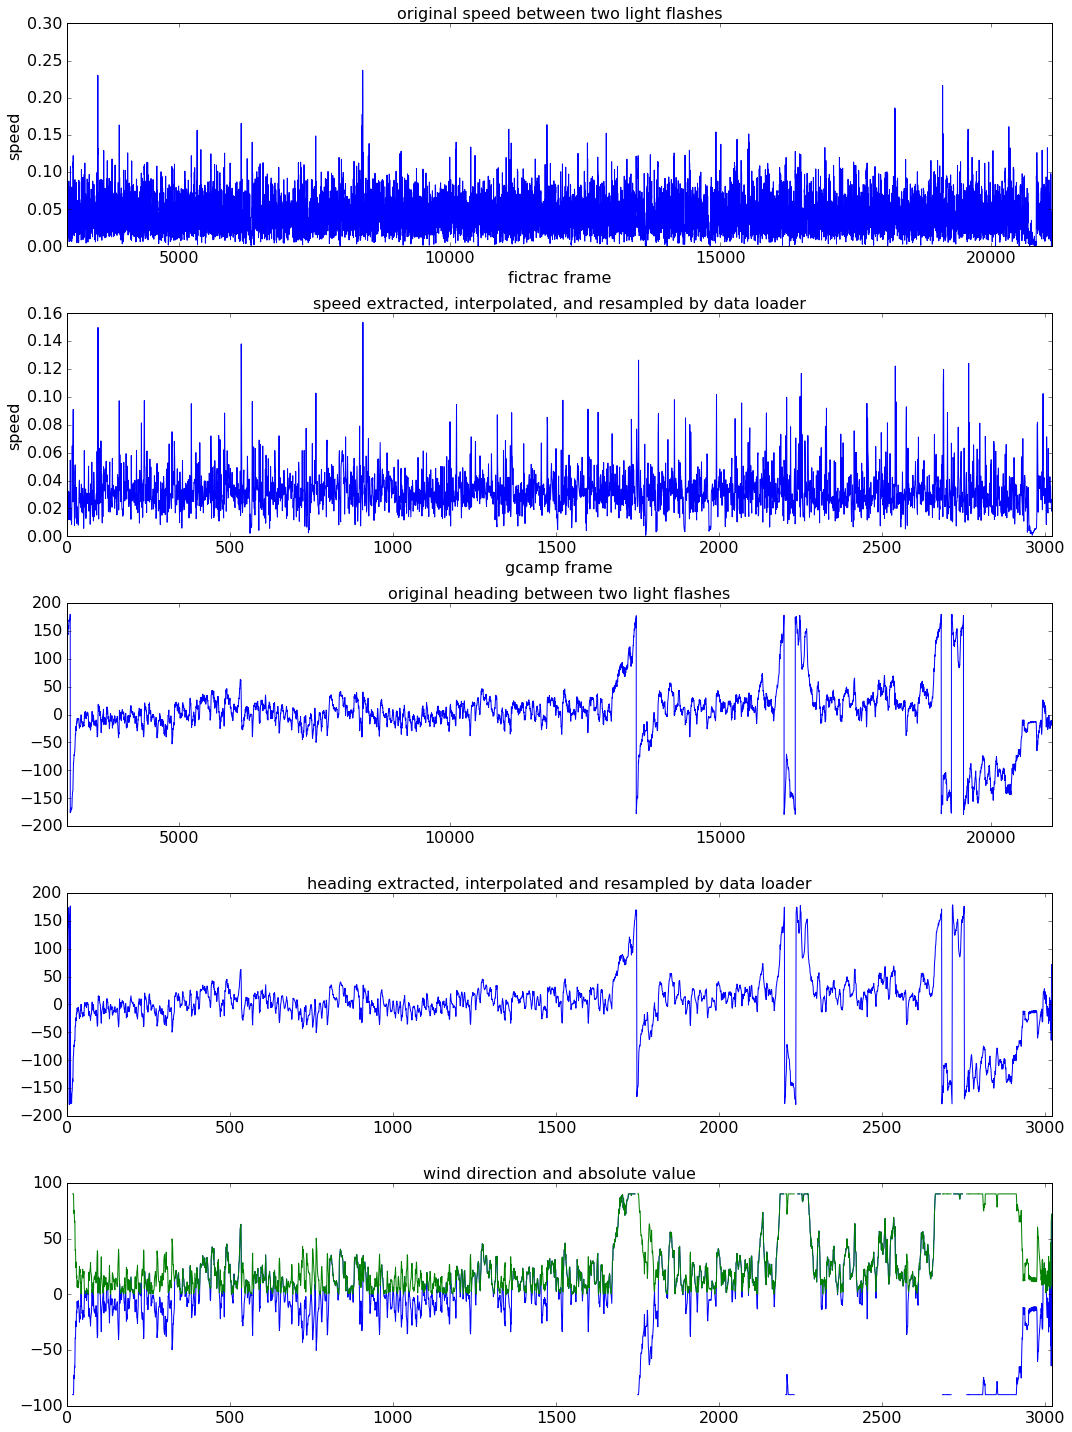

In [8]:
# plot behavioral data extracted directly from file vs processed through data loader

fig, axs = plt.subplots(5, 1, figsize=(15, 20), tight_layout=True)

br_speed_df = np.sqrt((df_behav.iloc[:, 5]**2 + df_behav.iloc[:, 6]**2 + df_behav.iloc[:, 7]**2))

axs[0].plot(df_behav.iloc[:, 0], br_speed_df)
axs[0].set_xlim(df_light_times.iloc[0, 0], df_light_times.iloc[1, 0])

axs[0].set_xlabel('fictrac frame')
axs[0].set_ylabel('speed')
axs[0].set_title('original speed between two light flashes')

axs[1].plot(dl.ball_rotation_speed)
axs[1].set_xlim(0, len(dl.ball_rotation_speed))

axs[1].set_xlabel('gcamp frame')
axs[1].set_ylabel('speed')
axs[1].set_title('speed extracted, interpolated, and resampled by data loader')

heading_df = (df_behav.iloc[:, 16] - np.pi) * 180 / np.pi

axs[2].plot(df_behav.iloc[:, 0], heading_df)
axs[2].set_xlim(df_light_times.iloc[0, 0], df_light_times.iloc[1, 0])
axs[2].set_title('original heading between two light flashes')

axs[3].plot(dl.heading)
axs[3].set_xlim(0, len(dl.heading))
axs[3].set_title('heading extracted, interpolated and resampled by data loader')

axs[4].plot(dl.wind_dir)
axs[4].plot(dl.wind_dir_abs)
axs[4].set_xlim(0, len(dl.wind_dir))
axs[4].set_title('wind direction and absolute value')

for ax in axs:
    
    set_fontsize(ax, 16)

# END OF TEST